In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from madxtools.math import *
def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 14
    mpl.rcParams['axes.titlesize'] = 20  # Change the number for your preferred fontsize
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

In [2]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [3]:
filename = "dispersion_measurement_data_2023_10_28_19h20m28s"
with open(filename+"/"+filename+".p", 'rb') as f:
    data = pickle.load(f)

In [4]:
data[0] # Datetime
data[1] # BTV Acquisition
data[2] # BTV Image
data[3] # Quadrupole Measured Pulse
data[4] # Logical K_FUNC_LIST
data[5] # UCAP BPM
data[6] # PS-LOG-BPM-IRRAD-UCAP_BPM_01/ProfilesAcquisition
data[7] # ?
data[8] # Ekin set 
data[9] # B-field
print("")


In [14]:
acq = 3
btv = list(data[2].keys())[0].split('/')[0]
t_list = []
mu_list = []
mu_error_list = []
tV_list = []
muV_list = []
muV_error_list = []
ekin_list = []
ekinV_list = []
for i in range(len(data[1][btv+'/Acquisition'])):
    try:
        x = data[1][btv+'/Acquisition'][i]["projPositionSet1"][acq]
        y = data[1][btv+'/Acquisition'][i]["projDataSet1"][acq]
        popt, pcov = do_gaussian_fit(x,y)
        mu = popt[2]
        mu_error = np.abs(np.sqrt(pcov[2,2]))
        mu_list.append(-mu)
        mu_error_list.append(mu_error)
        t_list.append(data[0][i])

        ekin = data[8]['Bfield_set'][i]
        ekin_list.append(ekin)
    except:
        pass

    try:
        x = data[1][btv+'/Acquisition'][i]["projPositionSet2"][acq]
        y = data[1][btv+'/Acquisition'][i]["projDataSet2"][acq]
        popt, pcov = do_gaussian_fit(x,y)
        mu = popt[2]
        mu_error = np.abs(np.sqrt(pcov[2,2]))
        muV_list.append(mu)
        muV_error_list.append(mu_error)
        tV_list.append(data[0][i])

        ekin = data[8]['Bfield_set'][i]
        ekinV_list.append(ekin)
    except:
        pass

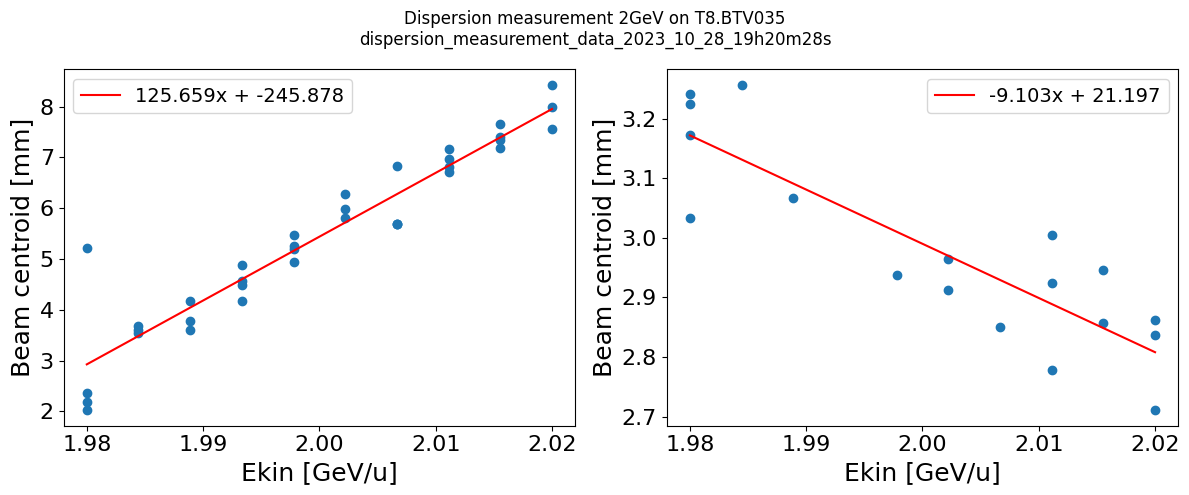

In [6]:
from scipy import stats
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(12,5))
fig.suptitle(f"Dispersion measurement 2GeV on {btv}\n"+filename)
ax[0].scatter(ekin_list, mu_list)
ax[0].set_xlabel("Ekin [GeV/u]")
ax[0].set_ylabel("Beam centroid [mm]")

x = np.array(ekin_list)
y = np.array(mu_list)
res = stats.linregress(x, mu_list)
ax[0].plot(x, res.intercept + res.slope*x, 'r', label = f"{round(res.slope,3)}x + {round(res.intercept,3)}")
ax[0].legend()



ax[1].scatter(ekinV_list, muV_list)
ax[1].set_xlabel("Ekin [GeV/u]")
ax[1].set_ylabel("Beam centroid [mm]")

x = np.array(ekinV_list)
y = np.array(muV_list)
res = stats.linregress(x, muV_list)
ax[1].plot(x, res.intercept + res.slope*x, 'r', label = f"{round(res.slope,3)}x + {round(res.intercept,3)}")
ax[1].legend()

Text(0, 0.5, 'B-field [G]')

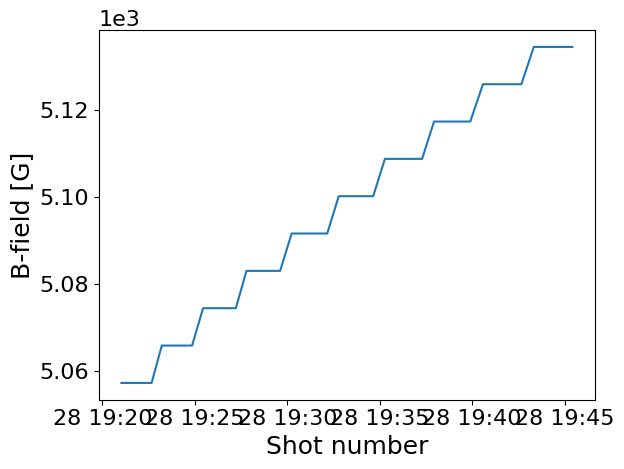

In [7]:
fig, ax = plt.subplots()
ax.plot(data[0],data[9])
ax.set_xlabel("Shot number")
ax.set_ylabel("B-field [G]")

364087.615


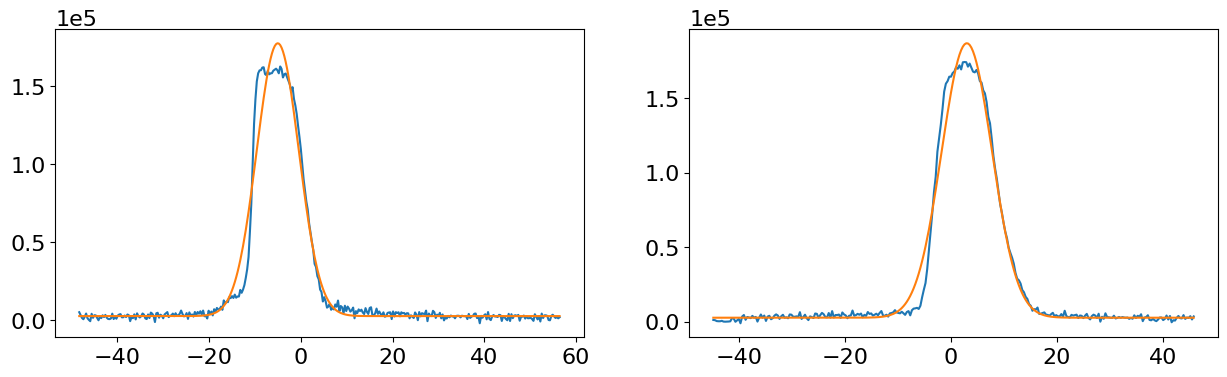

In [8]:
shot = 0
acq = 4
fig, ax = plt.subplots(1,2, figsize=(15,4))


y0 = data[1][btv+'/Acquisition'][shot]["projDataSet1"][0]
x = np.array(data[1][btv+'/Acquisition'][shot]["projPositionSet1"][acq])
y = np.array(data[1][btv+'/Acquisition'][shot]["projDataSet1"][acq]) - np.array(y0)
popt, pcov = do_gaussian_fit(x,y)

ax[0].plot(x,y)
ax[0].plot(x, gaussian_function(x, popt[0], popt[1], popt[2], popt[3]))
signal1 = gaussian_function(x, popt[0], popt[1], popt[2], popt[3]).max()

y0 = data[1][btv+'/Acquisition'][shot]["projDataSet2"][0]
x = np.array(data[1][btv+'/Acquisition'][shot]["projPositionSet2"][acq])
y = np.array(data[1][btv+'/Acquisition'][shot]["projDataSet2"][acq]) - np.array(y0)
popt, pcov = do_gaussian_fit(x,y)

ax[1].plot(x,y)
ax[1].plot(x, gaussian_function(x, popt[0], popt[1], popt[2], popt[3]))

signal2 = gaussian_function(x, popt[0], popt[1], popt[2], popt[3]).max()

signal = signal1 + signal2
print(round(signal,3))

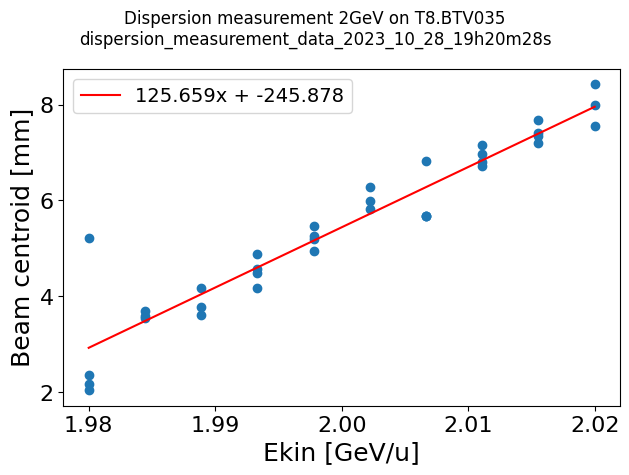

In [9]:
fig, ax = plt.subplots(tight_layout=True)
ax.scatter(ekin_list, mu_list)
ax.set_xlabel("Ekin [GeV/u]")
ax.set_ylabel("Beam centroid [mm]")
fig.suptitle(f"Dispersion measurement 2GeV on {btv}\n"+filename)

from scipy import stats
x = np.array(ekin_list)
y = np.array(mu_list)
res = stats.linregress(x, mu_list)
ax.plot(x, res.intercept + res.slope*x, 'r', label = f"{round(res.slope,3)}x + {round(res.intercept,3)}")
ax.legend()

In [10]:
with open("frev_dispersion.pickle", 'rb') as f:
    dfm = pickle.load(f)
dfm["timestamp"] = dfm['timestamp'] + pd.Timedelta(hours=2)

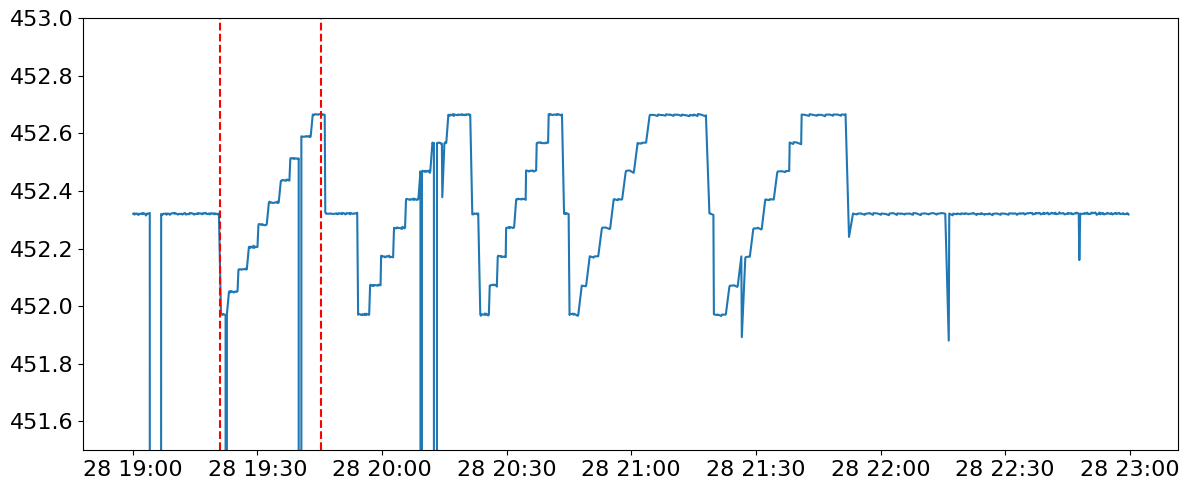

In [11]:
fig, ax = plt.subplots(tight_layout=True, figsize=(12,5))
ax.plot(dfm.timestamp, dfm.frev)
ax.set_ylim(451.5,453)

ax.axvline(min(data[0]), color='r', linestyle='--')
ax.axvline(max(data[0]), color='r', linestyle='--')

Text(0, 0.5, 'B-field [G]')

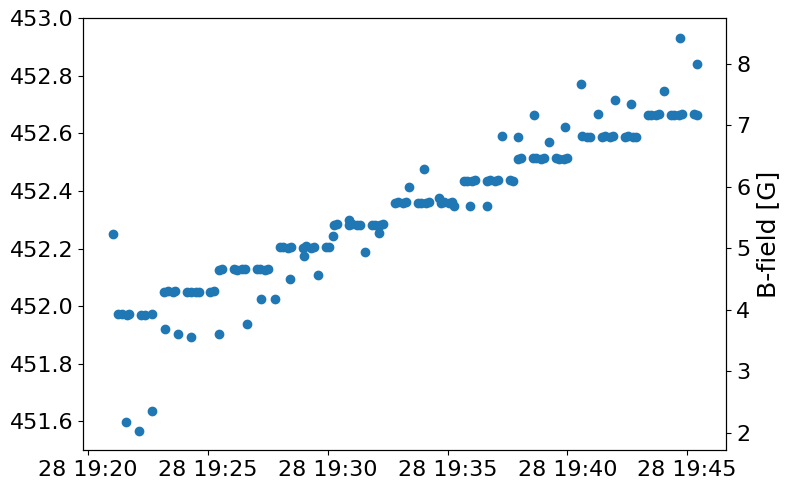

In [12]:
start_timestamp = pd.to_datetime(min(data[0]))
end_timestamp = pd.to_datetime(max(data[0]))

# Filtering the DataFrame for the given time range
filtered_dfm = dfm[(dfm.timestamp >= start_timestamp) & (dfm.timestamp <= end_timestamp)]

fig, ax = plt.subplots(tight_layout=True, figsize=(8,5))
ax.scatter(filtered_dfm.timestamp, filtered_dfm.frev)
ax.set_ylim(451.5,453)

ax2 = ax.twinx()
ax2.scatter(t_list,mu_list)
ax2.set_xlabel("Shot number")
ax2.set_ylabel("B-field [G]")

0.851 ± 0.047
-0.061 ± 0.009
   Dispersion     Error
0    0.850723  0.047496
1   -0.061195  0.008629


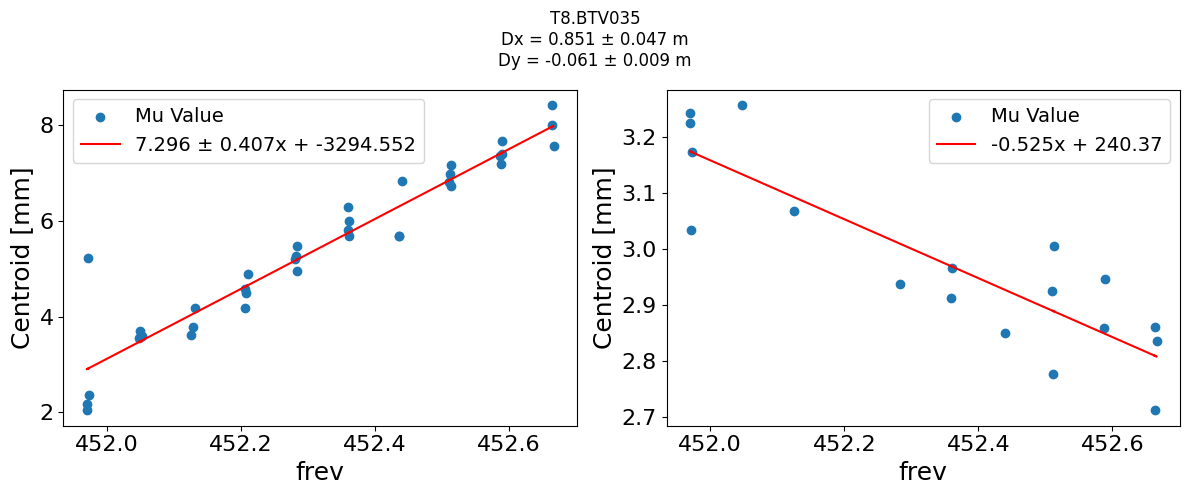

In [34]:
# Convert t_list to a pandas Series with the same datetime format as dfm.timestamp
t_series = pd.Series(pd.to_datetime(t_list), name='timestamp')
mu_series = pd.Series(mu_list, name='mu_value')

# Combine t_series and mu_series into a DataFrame for easier handling
mu_df = pd.DataFrame({'timestamp': t_series, 'mu_value': mu_series})

# Find the closest match for each timestamp in mu_df within filtered_dfm
# This requires a custom function to find the nearest timestamp and map the mu_values
def find_nearest(group, reference_df):
    # Find the row in reference_df where timestamp is closest to the group's timestamp
    nearest_index = ((reference_df['timestamp'] - group['timestamp'].iloc[0]).abs().idxmin())
    # Return the mu_value with the frev from the nearest timestamp
    return pd.Series({
        'frev': reference_df.loc[nearest_index, 'frev'],
        'mu_value': group['mu_value'].iloc[0]
    })

# Apply the custom function to map mu_values to frev based on nearest timestamp
mapped_values = mu_df.groupby('timestamp').apply(find_nearest, reference_df=filtered_dfm).reset_index(drop=True)

# Now you can plot using matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)

# Plotting mapped mu_values as a function of frev
ax[0].scatter(mapped_values.frev, mapped_values.mu_value, label='Mu Value')

x = np.array(mapped_values.frev)
y = np.array(mapped_values.mu_value)
res = stats.linregress(x, mu_list)
slope_error = res.stderr
ax[0].plot(x, res.intercept + res.slope*x, 'r', label = f"{round(res.slope,3)} ± {round(slope_error,3)}x + {round(res.intercept,3)}")
ax[0].set_ylabel('Centroid [mm]')
ax[0].set_xlabel('frev')
ax[0].tick_params(axis='y')
ax[0].legend()


# Calculate the dispersion
# The dispersion is given by the slope of the linear fit

gamma = 11.414
gamma_transition = 6.12719
eta = (1/gamma_transition**2 - 1/gamma**2)
frev_0 = 452.3
dispersion = res.slope * 1/(eta*frev_0)
dispersion_error = slope_error / (eta * frev_0)
print(f"{dispersion:.3f} ± {dispersion_error:.3f}")


t_series = pd.Series(pd.to_datetime(tV_list), name='timestamp')
mu_series = pd.Series(muV_list, name='mu_value')

# Combine t_series and mu_series into a DataFrame for easier handling
mu_df = pd.DataFrame({'timestamp': t_series, 'mu_value': mu_series})


# Apply the custom function to map mu_values to frev based on nearest timestamp
mapped_values = mu_df.groupby('timestamp').apply(find_nearest, reference_df=filtered_dfm).reset_index(drop=True)

# Plotting mapped mu_values as a function of frev
ax[1].scatter(mapped_values.frev, mapped_values.mu_value, label='Mu Value')

x = np.array(mapped_values.frev)
y = np.array(mapped_values.mu_value)
res = stats.linregress(x, muV_list)
slope_error = res.stderr
ax[1].plot(x, res.intercept + res.slope*x, 'r', label = f"{round(res.slope,3)}x + {round(res.intercept,3)}")
ax[1].set_ylabel('Centroid [mm]')
ax[1].set_xlabel('frev')
ax[1].tick_params(axis='y')
ax[1].legend()


# Calculate the dispersion
# The dispersion is given by the slope of the linear fit

gamma = 11.414
gamma_transition = 6.12719
eta = (1/gamma_transition**2 - 1/gamma**2)
frev_0 = 452.3
dispersionV = res.slope * 1/(eta*frev_0)
dispersionV_error = slope_error / (eta * frev_0)
print(f"{dispersionV:.3f} ± {dispersionV_error:.3f}")


fig.suptitle(f"{btv}\nDx = {dispersion:.3f} ± {dispersion_error:.3f} m\nDy = {dispersionV:.3f} ± {dispersionV_error:.3f} m")

import pickle


# Define the dispersion values and their errors
dispersions = [dispersion, dispersionV]
errors = [dispersion_error, dispersionV_error]

# Create a dictionary with the data
data = {'Dispersion': dispersions, 'Error': errors}

# Create the dataframe
df = pd.DataFrame(data)

# Print the dataframe
print(df)


with open(f"dispersion_{btv}.pickle", 'wb') as f:
    pickle.dump(df, f)

In [22]:
from scipy.odr import Model, RealData, ODR

# Convert t_list to a pandas Series with the same datetime format as dfm.timestamp
t_series = pd.Series(pd.to_datetime(t_list), name='timestamp')
mu_series = pd.Series(mu_list, name='mu_value')

# Combine t_series and mu_series into a DataFrame for easier handling
mu_df = pd.DataFrame({'timestamp': t_series, 'mu_value': mu_series})

# Find the closest match for each timestamp in mu_df within filtered_dfm
# This requires a custom function to find the nearest timestamp and map the mu_values
def find_nearest(group, reference_df):
    # Find the row in reference_df where timestamp is closest to the group's timestamp
    nearest_index = ((reference_df['timestamp'] - group['timestamp'].iloc[0]).abs().idxmin())
    # Return the mu_value with the frev from the nearest timestamp
    return pd.Series({
        'frev': reference_df.loc[nearest_index, 'frev'],
        'mu_value': group['mu_value'].iloc[0]
    })

# Apply the custom function to map mu_values to frev based on nearest timestamp
mapped_values = mu_df.groupby('timestamp').apply(find_nearest, reference_df=filtered_dfm).reset_index(drop=True)



x = np.array(mapped_values.frev)
y = np.array(mapped_values.mu_value)

x_errors = 1e-6*np.ones(len(mu_error_list))
y_errors = mu_error_list

# Define the model function (linear in this case)
def linear_model(p, x):
    return p[0] * x + p[1]

model = Model(linear_model)

# Create a RealData object using your dataset and errors
data = RealData(x, y, sx=x_errors, sy=y_errors)

# Set up ODR with the model and data
odr = ODR(data, model, beta0=[1., 0.])

# Run the regression
out = odr.run()

# Extract the slope, intercept, and their errors
slope, intercept = out.beta
slope_error, intercept_error = out.sd_beta


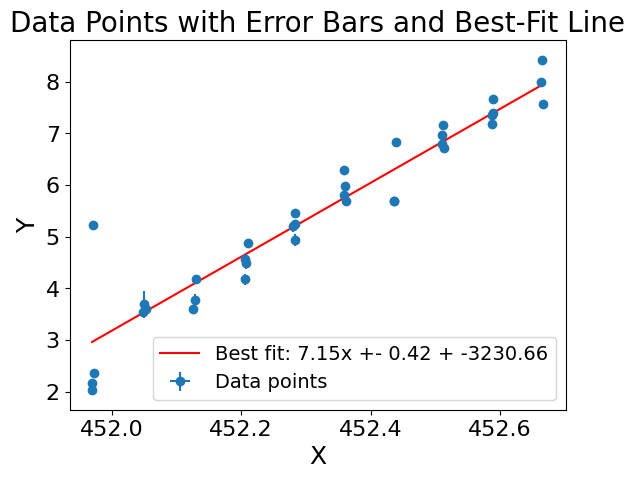

In [29]:
import matplotlib.pyplot as plt
import numpy as np


# Create figure and axis
fig, ax = plt.subplots()

# Plot data points with error bars
ax.errorbar(x, y, xerr=x_errors, yerr=y_errors, fmt='o', label='Data points')

# Generate x values for the best-fit line plot
x_fit = np.linspace(min(x) - np.mean(x_errors), max(x) + np.mean(x_errors), 100)

# Calculate y values for the best-fit line
y_fit = intercept + slope * x_fit

# Plot the best-fit line
ax.plot(x_fit, y_fit, 'r-', label=f'Best fit: {slope:.2f}x +- {slope_error:.2f} + {intercept:.2f}')

# # Optional: Plotting the error range for the fitted line (slope +/- error)
# y_fit_high = (intercept + intercept_error) + (slope + slope_error) * x_fit
# y_fit_low = (intercept - intercept_error) - (slope - slope_error) * x_fit
# ax.fill_between(x_fit, y_fit_low, y_fit_high, color='r', alpha=0.2, label='Slope uncertainty')

# Customizing the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Data Points with Error Bars and Best-Fit Line')
ax.legend()

# Show plot
plt.show()
